<a href="https://colab.research.google.com/github/Taskeen009/major_project_final_year/blob/master/diabetes_prediction03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DIABETES PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
diabetic_dataset = pd.read_csv('diabetes.csv')

In [ ]:
# print first 5 rows of the dataset
diabetic_dataset .head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetic_dataset.shape

(768, 9)

In [ ]:
#Feature information
diabetic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetic_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# The distribution of the Outcome variable was examined.
diabetic_dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# The distribution of the Outcome variable was examined.
diabetic_dataset["Outcome"].value_counts()*100/len(diabetic_dataset)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
diabetic_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*No value is missing*

if there would be any we would have run this code

In [ ]:
diabetic_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


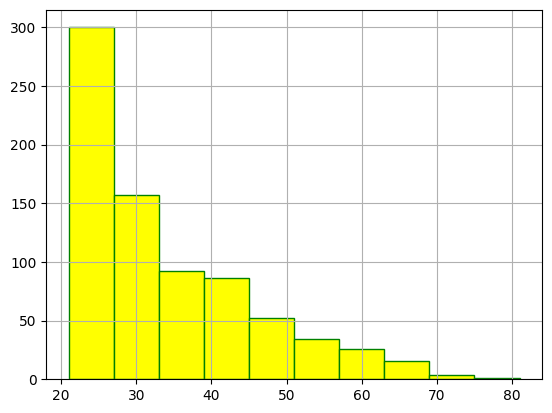

In [ ]:
# The histagram of the Age variable was reached.
diabetic_dataset["Age"].hist(edgecolor = "green",color="yellow");

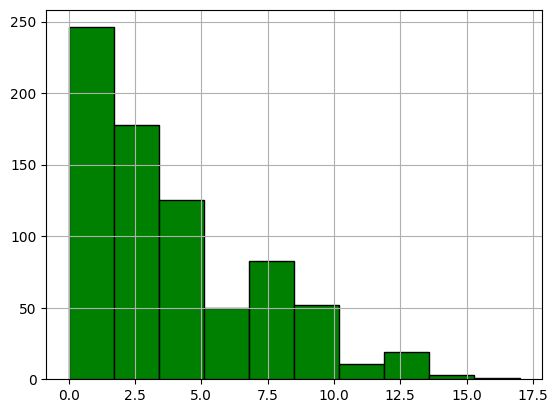

In [ ]:
diabetic_dataset["Pregnancies"].hist(edgecolor = "black",color="green");

In [ ]:
print("Max Age: " + str(diabetic_dataset["Age"].max()) + " Min Age: " + str(diabetic_dataset["Age"].min()))

Max Age: 81 Min Age: 21


<Axes: >

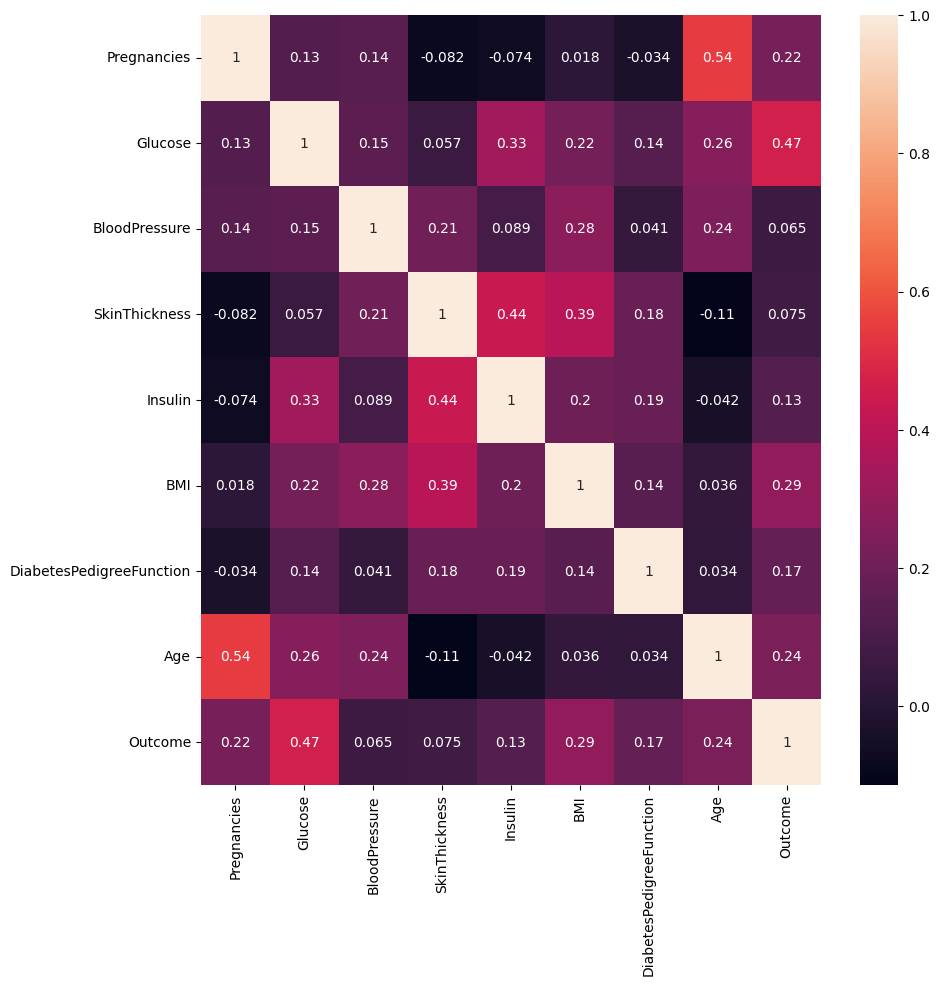

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(diabetic_dataset.corr(), annot = True)

<ipython-input-15-a95a205abe16>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetic_dataset.Age, bins = 20, ax=ax[0,0])
<ipython-input-15-a95a205abe16>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetic_dataset.Pregnancies, bins = 20, ax=ax[0,1])
<ipython-input-15-a95a205abe16>:5: U

<Axes: xlabel='BMI', ylabel='Density'>

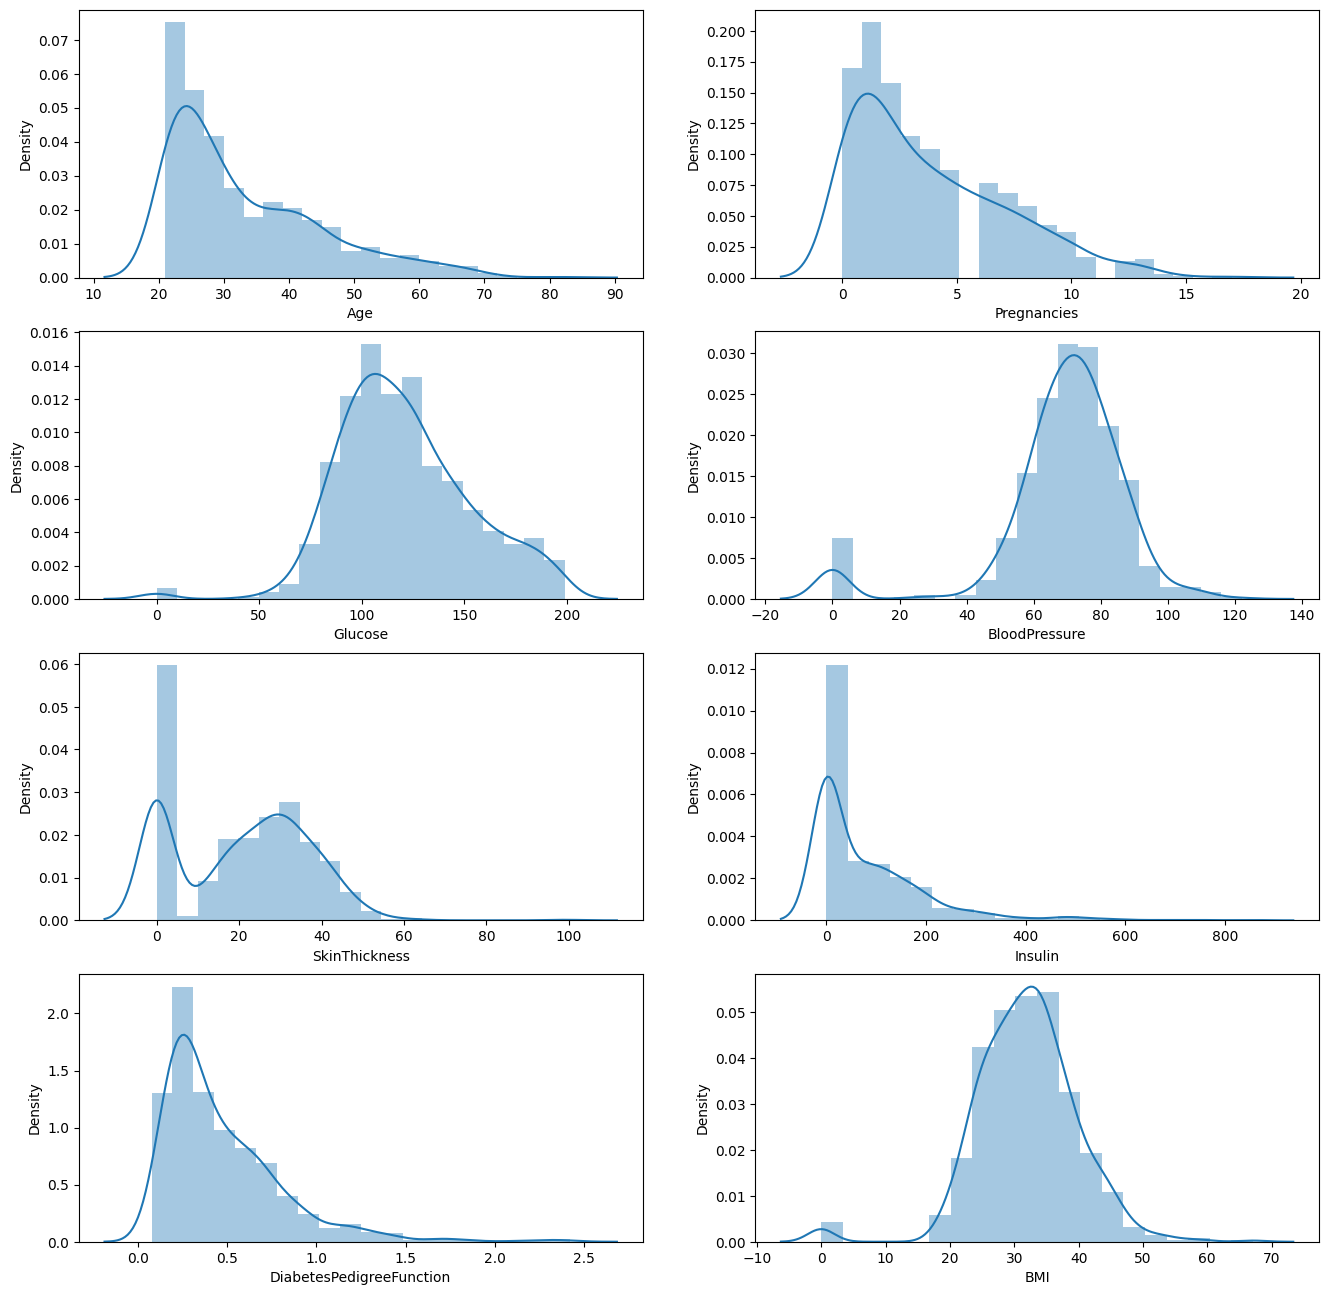

In [ ]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(diabetic_dataset.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(diabetic_dataset.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(diabetic_dataset.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(diabetic_dataset.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(diabetic_dataset.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(diabetic_dataset.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(diabetic_dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(diabetic_dataset.BMI, bins = 20, ax=ax[3,1]) 

In [ ]:
diabetic_dataset.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [ ]:
diabetic_dataset.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [ ]:
diabetic_dataset.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [ ]:
diabetic_dataset.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [ ]:
diabetic_dataset.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [ ]:
diabetic_dataset.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [ ]:
diabetic_dataset.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


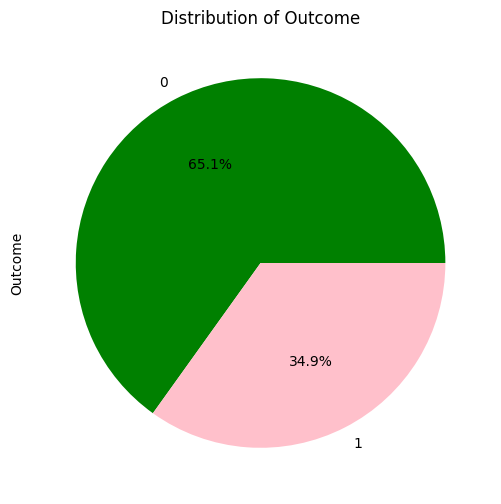

In [ ]:
plt.figure(figsize=(6,6))
diabetic_dataset['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'pink'])
plt.title('Distribution of Outcome')
plt.show()

**Data Preprocessing**

**Missing Observation Analysis**

In [ ]:
diabetic_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetic_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
diabetic_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Now, we can look at where are missing values
diabetic_dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

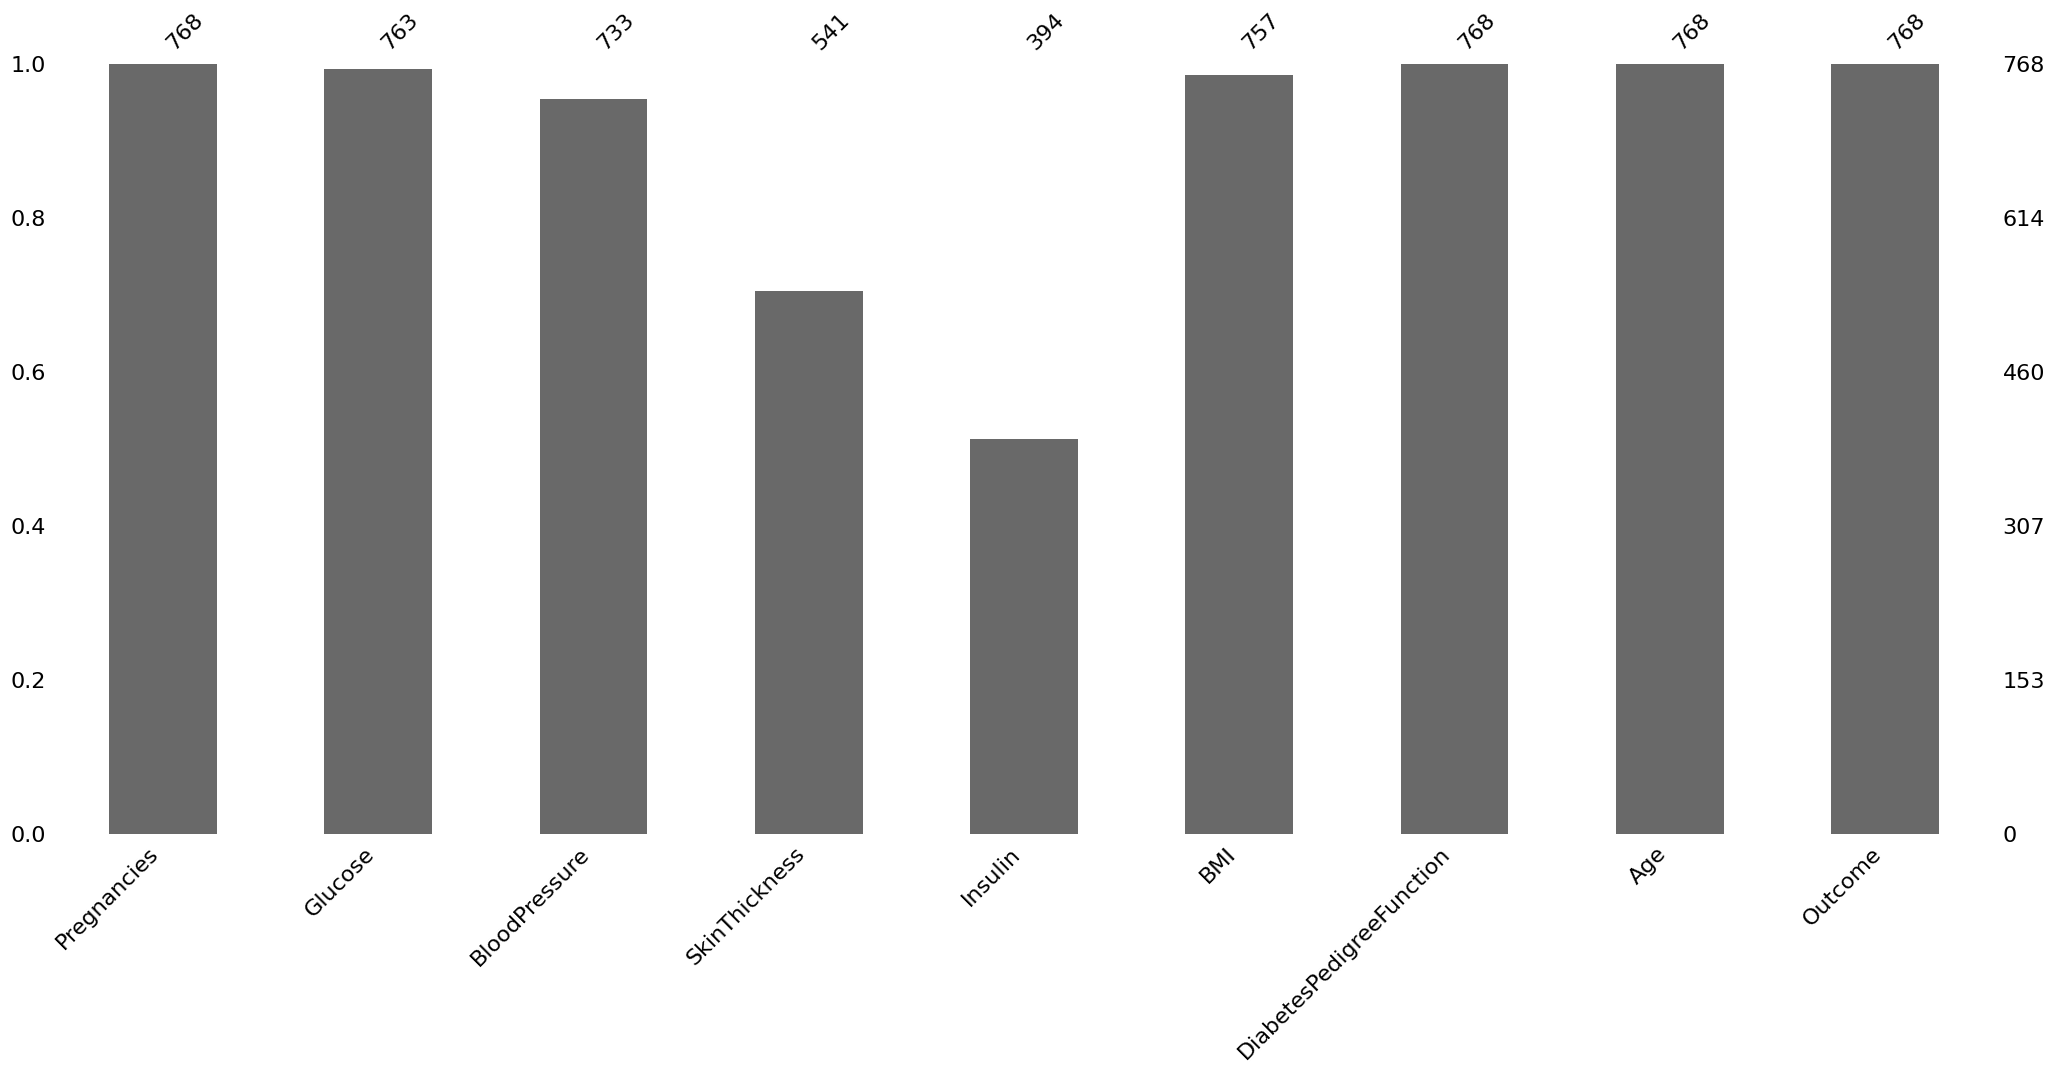

In [ ]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting 
import missingno as msno
msno.bar(diabetic_dataset);

In [ ]:
def median_target(var):   
    temp = diabetic_dataset[diabetic_dataset[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
columns = diabetic_dataset.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    diabetic_dataset.loc[(diabetic_dataset['Outcome'] == 0 ) & (diabetic_dataset[i].isnull()), i] = median_target(i)[i][0]
    diabetic_dataset.loc[(diabetic_dataset['Outcome'] == 1 ) & (diabetic_dataset[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
#Checking correlation between columns
print(diabetic_dataset.corr()["Outcome"].abs().sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.495990
Insulin                     0.377081
BMI                         0.315577
SkinThickness               0.295138
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.174469
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64


In [ ]:
diabetic_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Missing values were filled.
diabetic_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Outlier Observation Analysis**

In [ ]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in diabetic_dataset:
    
    Q1 = diabetic_dataset[feature].quantile(0.25)
    Q3 = diabetic_dataset[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if diabetic_dataset[(diabetic_dataset[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


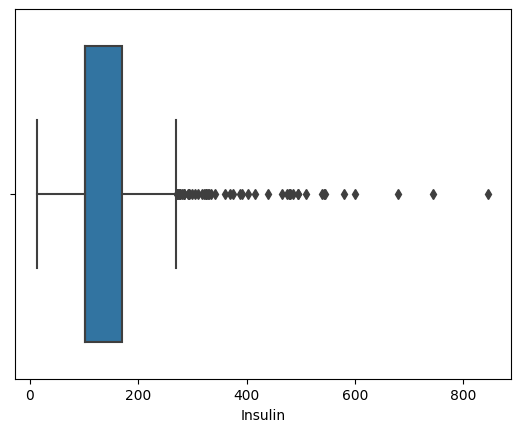

In [ ]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = diabetic_dataset["Insulin"]);

In [ ]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = diabetic_dataset.Insulin.quantile(0.25)
Q3 = diabetic_dataset.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
diabetic_dataset.loc[diabetic_dataset["Insulin"] > upper,"Insulin"] = upper

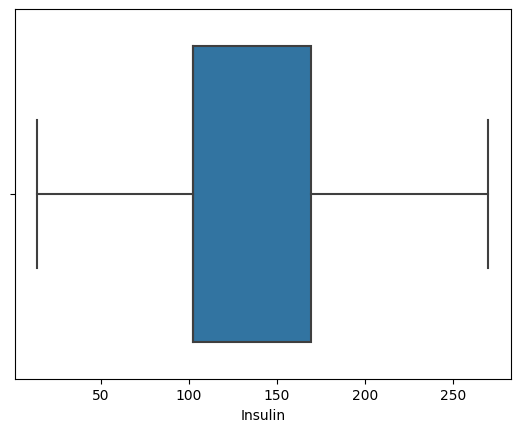

In [ ]:
import seaborn as sns
sns.boxplot(x = diabetic_dataset["Insulin"]);

**Local Outlier Factor (LOF)**

In [ ]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(diabetic_dataset)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [ ]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [ ]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-1.740031580305444

In [ ]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = diabetic_dataset[outlier]

In [ ]:
# The size of the data set was examined.
diabetic_dataset.shape

(768, 9)

**Feature Engineering**

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [ ]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype="category")
diabetic_dataset["NewBMI"] = NewBMI
diabetic_dataset.loc[diabetic_dataset["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
diabetic_dataset.loc[(diabetic_dataset["BMI"] > 18.5) & (diabetic_dataset["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
diabetic_dataset.loc[(diabetic_dataset["BMI"] > 24.9) & (diabetic_dataset["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
diabetic_dataset.loc[(diabetic_dataset["BMI"] > 29.9) & (diabetic_dataset["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
diabetic_dataset.loc[(diabetic_dataset["BMI"] > 34.9) & (diabetic_dataset["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
diabetic_dataset.loc[diabetic_dataset["BMI"] > 39.9, "NewBMI"] = NewBMI[5]


In [ ]:
diabetic_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [ ]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
# The operation performed was added to the dataframe.
diabetic_dataset = diabetic_dataset.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

diabetic_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [ ]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype="category")
diabetic_dataset["NewGlucose"] = NewGlucose
diabetic_dataset.loc[diabetic_dataset["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
diabetic_dataset.loc[(diabetic_dataset["Glucose"] > 70) & (diabetic_dataset["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
diabetic_dataset.loc[(diabetic_dataset["Glucose"] > 99) & (diabetic_dataset["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
diabetic_dataset.loc[diabetic_dataset["Glucose"] > 126, "NewGlucose"] = NewGlucose[3]


In [ ]:
diabetic_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


**One Hot Encoding**

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [ ]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
diabetic_dataset = pd.get_dummies(diabetic_dataset, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [ ]:
diabetic_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [ ]:
categorical_df = diabetic_dataset[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [ ]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [ ]:
Y = diabetic_dataset["Outcome"]
X = diabetic_dataset.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.  
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,5.007843,0.235294


In [ ]:
X = pd.concat([X,categorical_df], axis = 1)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294,1,0,0,0,0,0,0,0,0,1
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647,0,0,0,1,0,1,0,1,0,0
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471,0,0,0,0,0,0,0,0,0,1
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588,0,0,0,1,0,1,0,1,0,0
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,5.007843,0.235294,0,0,1,0,0,0,0,0,0,1


In [ ]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 18) (614, 18) (154, 18)


**Training the Model**

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.8338762214983714
Accuracy score of the test data :  0.8636363636363636


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# create a logistic regression model
model = LogisticRegression()
# fit the model to the training data
model.fit(X_train, Y_train)
# predict the target variable for the training data
X_train_prediction = model.predict(X_train)
# compute the accuracy score for the training data
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
# predict the target variable for the test data
X_test_prediction = model.predict(X_test)
# compute the accuracy score for the test data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.8599348534201955
Accuracy score of the test data :  0.8571428571428571


In [ ]:
from sklearn.metrics import confusion_matrix
# Predict the target variable for the test data
Y_pred = model.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[91  9]
 [13 41]]


In [ ]:
from sklearn.metrics import classification_report
# predict the target variable for the test data
Y_test_prediction = model.predict(X_test)
# print the classification report for the test data
print(classification_report(Y_test, Y_test_prediction))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       100
           1       0.82      0.76      0.79        54

    accuracy                           0.86       154
   macro avg       0.85      0.83      0.84       154
weighted avg       0.86      0.86      0.86       154



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the range of values for n_estimators
n_estimators_range = range(1, 41)

# Initialize an empty list to store the cross-validation scores
cv_scores = []

# Perform cross-validation for each value of n_estimators
for n_estimators in n_estimators_range:
    # Create a Random Forest classifier with the current value of n_estimators
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=12345)
    
    # Perform cross-validation with 5 folds
    scores = cross_val_score(rfc, X, Y, cv=5)
    
    # Calculate the average score across all folds
    mean_score = np.mean(scores)
    
    # Append the mean score to the list of cv_scores
    cv_scores.append(mean_score)

# Find the index of the best score
best_index = np.argmax(cv_scores)

# Get the best value of n_estimators
best_n_estimators = n_estimators_range[best_index]

print("Best value for n_estimators:", best_n_estimators)

Best value for n_estimators: 37


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Creating the Random Forest Classifier model
classifier = RandomForestClassifier(n_estimators=37, random_state=42)
# Training the model on the training data
classifier.fit(X_train, Y_train)
# Predicting the output for the training data
y_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, y_train_prediction)
print("Accuracy on training data: ", training_data_accuracy)
# Predicting the output for the testing data
y_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, y_test_prediction)
print("Accuracy on testing data: ", testing_data_accuracy)

Accuracy on training data:  1.0
Accuracy on testing data:  0.8831168831168831


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Creating the Decision Tree Classifier model
classifier = DecisionTreeClassifier()
# Training the model on the training data
classifier.fit(X_train, Y_train)
# Predicting the output for the training data
y_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, y_train_prediction)
print("Accuracy on training data: ", training_data_accuracy)
# Predicting the output for the testing data
y_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, y_test_prediction)
print("Accuracy on testing data: ", testing_data_accuracy)


Accuracy on training data:  1.0
Accuracy on testing data:  0.8766233766233766


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Creating the KNN Classifier model with k=5
classifier = KNeighborsClassifier(n_neighbors=1)
# Training the model on the training data
classifier.fit(X_train, Y_train)
# Predicting the output for the training data
y_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, y_train_prediction)
print("Accuracy on training data: ", training_data_accuracy)
# Predicting the output for the testing data
y_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, y_test_prediction)
print("Accuracy on testing data: ", testing_data_accuracy)

Accuracy on training data:  1.0
Accuracy on testing data:  0.7012987012987013


Choosing K value


In [ ]:
error_rate = []
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

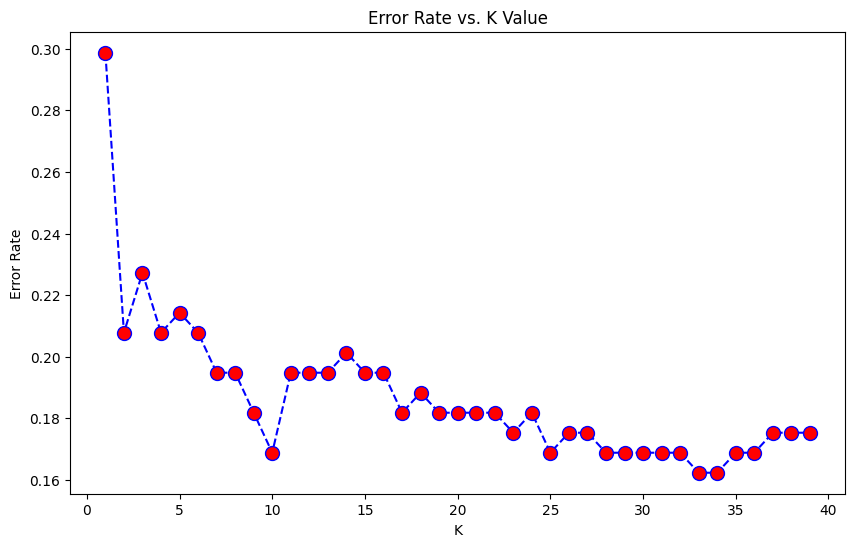

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=24)
# Train the model on the training data
KNN.fit(X_train, Y_train)
# Make predictions on the training and test data
X_train_prediction = KNN.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# Calculate the accuracy of the model on the training and test data
X_test_prediction = KNN.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print((training_data_accuracy)*100,2)
print((test_data_accuracy)*100,2)

87.62214983713355 2
81.81818181818183 2


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Creating the XGBoost Classifier model
classifier = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3)
# Training the model on the training data
classifier.fit(X_train, Y_train)
# Predicting the output for the training data
y_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, y_train_prediction)
print("Accuracy on training data: ", training_data_accuracy)
# Predicting the output for the testing data
y_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, y_test_prediction)
print("Accuracy on testing data: ", testing_data_accuracy)

Accuracy on training data:  1.0
Accuracy on testing data:  0.8831168831168831


**FINAL**

In [ ]:
# Define a list of models and their names
models = [LogisticRegression(), svm.SVC(kernel='linear'), KNeighborsClassifier(n_neighbors=24), DecisionTreeClassifier(), RandomForestClassifier(), xgb.XGBClassifier(objective="binary:logistic", random_state=42)]

model_names = ["Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost"]

# Loop through the models and fit them to the training data, then evaluate their accuracy on the testing data
for i, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = round(accuracy_score(Y_pred, Y_test)*100, 2)
    print("Accuracy of", model_names[i], ":", accuracy, "%")

Accuracy of Logistic Regression : 85.71 %
Accuracy of Support Vector Machine : 86.36 %
Accuracy of K-Nearest Neighbors : 81.82 %
Accuracy of Decision Tree : 83.12 %
Accuracy of Random Forest : 89.61 %
Accuracy of XGBoost : 89.61 %


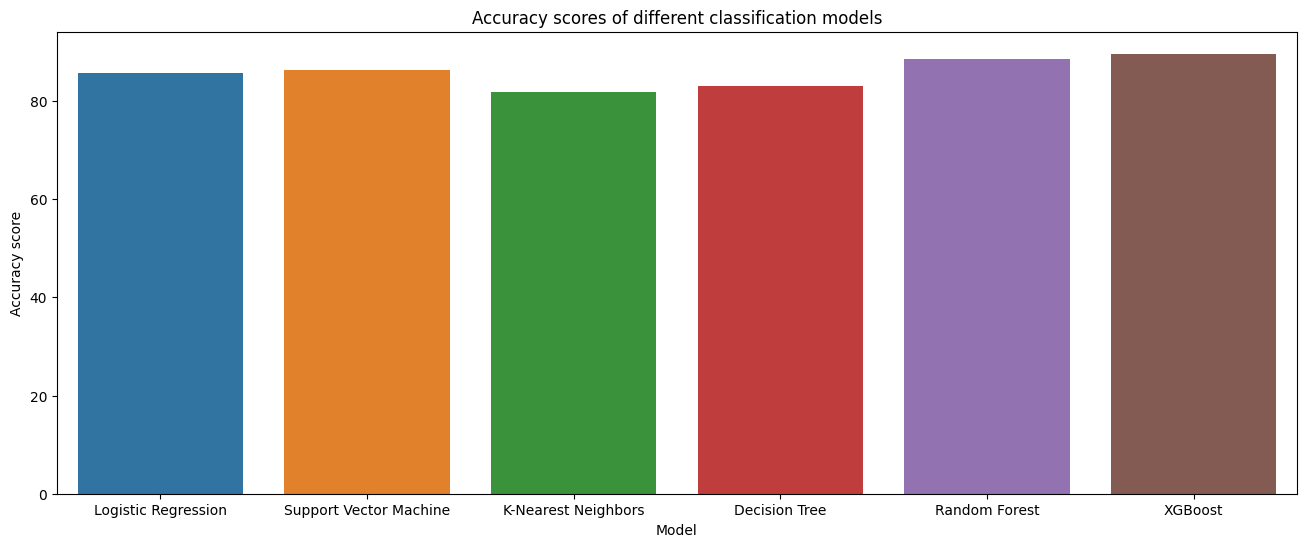

In [ ]:
import seaborn as sns
accuracy_scores=[85.71,86.36,81.82,83.12,88.61,89.61]
plt.figure(figsize=(16, 6))
sns.barplot(x=model_names, y=accuracy_scores)
plt.title("Accuracy scores of different classification models")
plt.xlabel("Model")
plt.ylabel("Accuracy score")
plt.show()

**MPORTING PICKLE FILE**

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('/content/diabt_model_saved','wb'))

In [ ]:
model_loaded=pickle.load(open('/content/diabt_model_saved','rb'))